# <center> TRATAMENTO E ANÁLISE DE QUESTIONÁRIO
## PARTE 1: CADERNO DE TRATAMENTO DE DADOS
    
### Objectivos 
Este notebook trata os dados de 2 questionários efetuados a empreendedores e respectivas incubadoras de forma.
Os principais objectivos deste projecto são:
- Criar um dataset adequado ao tratamento estatístico
- Identificar e caracterizar as variáveis possíveis de serem extraidas do questionário
- Representar, sempre que possível graficamente as variáveis
- Facilitar a identificação de hipóteses
### Metodologia / Atividades
De forma a obter um dataset optimizado para tratamento estatistico seram efetuadas as seguintes operações:
1. Setup Inicial e pré tratamento de dados:
    - [x] Criação de um repositório privado com ficheiros originais (1|-)
    - [x] Pré tratamento do ficheiros de entrada para importação (1|)
    - [x] Inicialização do report, atividades e importação do dois datasets disponíveis (-|-) 
2. Limpeza dos dados:
    - [ ] Correção / harmonização e simplificação de termos e perguntas (1|))
        - [x] incubados 
        - [ ] incubadoras
    - [x] Eliminar perguntas “merged” e criação de perguntas/variáveis individuais para cada (3|)
    - [x] Agrupar e simplificar respostas do tipo “lista” (por exemplo ferramentas utilizadas ou problemas mais frequentes) (2|)
    - [x] Preenchimento de valores omissos e correção de strings(texto) (1|)
    - [x] Simplificação de categorias (por exemplo classes de idades) (1|))
    - [x] Criar variáveis categóricas para as perguntas abertas (x)
3. ~~Análise de dados~~
    - [x] ~~Criação de estatísticas simples (cerca de 80 variáveis)~~ (3)
    - [x] ~~Identificação das variáveis mais relevantes, analise e criação de plots para essas (até 10)~~ (5-6h)
    

# 1. Setup Inicial e pré-tratamento 
Foram recebido 3 ficheiros (2 excel e 1 doc). Foram criadas cópias dos 2 ficheiros e efetuadas as seguintes alterações:

|Novo File|survey_incubados.xls   |survey_incubadoras.xls|
|--------:|:-----------------------|:-----------------------|
|ficheiro original|Questionário para Incubados Base de dados (1)|Questionário para gestores aprovado Base de Dados.xlsx|
|#1|"Sector de Actividade do Negócio"-> *unmerge* e criaçao de **activity_sector**_1,2,3..5|"Vínculos Institucionais da Incubadora"-> *unmerge* e criação de **vinculo**_1,2|
|#2|"Quais as principais dificuldades da empresa durante o processo de incubação" -> *unmerge* e criaçao de **dificulty**_1,2,3..6|"Qual é o estágio de incubação?" -> *unmerge* e criaçao de **stage_1**,2,3..6|
|#3|"Quais os conhecimentos gestão transferidos pela incubadora".-> *unmerge* e criaçao de **knowledge_transfered**_1,2,3..7|"Como é feita a selecção das empresas que serão incubadas?"-> *unmerge* e criaçao de **select_by_projects, select_by_ideas, select_by_others**; dado o reduzido numero de respostas os valores foram substituidos por sim/nao com base nas respostas disponiveis|
|#4|"Quais as ferramentas e práticas são utilizadas pela incubadora para a transferência de conhecimento de gestão a empresa?" -> *unmerge* e criaçao de **knw_transfer_tool**_1,2..4|"Quais são as principais carências das empresas incubadas durante o processo de incubação?" -> *unmerge* e criaçao de **handicap_entrepeneur_knw,handicap_technical_knw,handicap_management_knw, handicap_management_exp**; considerando o numero reduzido de observações substituiriam se os valores por sim/nao |
|#5|"O que mais lhe ajudou a incubadora" -> *unmerge* e criaçao de **inc_value**_1,2..4|"Quanto ao Conhecimento de gestão"-> *unmerge* e criação de **manag_knw**_1,2..6|
|#6|"Qual foi à vantagem de ter permanecido na incubadora?"-> *unmerge* e criaçao de **inc_result**_1,2..4|"Quais as ferramentas e práticas utilizadas para transferencia de conhecimento"-> *unmerge* e criação de **knw_transfer_tools**_1,2..6|
|#7|eliminaçao da linha que distingue os dados do empreendedor das empresas (passa a constar do nome da variável)|idem|
|#8|criação da coluna "id" que recebe o numero sequencial de cada linha de forma a manter essa informação|idem|
|#9||correçao dos valores "nome da incubadora" de modo a coincidir com os valores utilizados no survey_incubados.xls|

    

In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#leitura do ficheiro "survey_incubados.xls"
incubados = pd.read_excel("./data_input/survey_incubados.xls", index_col=0, true_values=["Sim"],false_values=["Não"])
#leitura do ficheiro "survey_incubadorsa.xls"
incubadoras = pd.read_excel("./data_input/survey_incubadoras.xls", index_col=0, true_values=["Sim"],false_values=["Não"])

### Visualização dos  Datasets 
A importação dois surveys foi bem sucedida como se verifica abaixo:
Os dois questionários serão guardados nas variáveis `incubados` e `incubadoras`. 

In [3]:
pd.options.display.max_columns = 100 #increase the limit of columns seen

In [4]:
incubados

,Nome,Grupo Etário,Sexo,Nível de Escolaridade,Nome da Incubadora,Nome da Empresa,Localização do Empreendimento,Número de Funcionários,activity_sector_1,activity_sector_2,activity_sector_3,activity_sector_4,activity_sector_5,Tempo em Actividade,A sua empresa está certificada pelo INAPEM,Como está classificada a sua Empresa?,Há quanto tempo a empresa está incubada,Em que etapa do processo de incubação ela se encontra,Como classifica o grau e a frequência de comunicação e interacção entre incubadora e empresa?,dificulty_1,dificulty_2,dificulty_3,dificulty_4,dificulty_5,dificulty_6,knowledge_transfered_1,knowledge_transfered_2,knowledge_transfered_3,knowledge_transfered_4,knowledge_transfered_5,knowledge_transfered_6,knowledge_transfered_7,knw_transfer_tool_1,knw_transfer_tool_2,knw_transfer_tool_3,knw_transfer_tool_4,inc_value_1,inc_value_2,inc_value_3,inc_value_4,inc_value_5,inc_value_6,inc_value_7,inc_result_1,inc_result_2,inc_result_3,inc_result_4,inc_result_5,A incubadora tem ligações com as Universidades,A incubadora continua a apoiar após a sua saída da incubadora?
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Agostinho Bumi,De 55 a 64 anos,Masculino,Licenciatura,CLESE DE CABINDA,"CBL – CORPORAÇÃO BRILHANTE, LDA","CABINDA, MUNICÍPIO SEDE.",Entre 10 e 100,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,NaN,De 6 a 10 anos,False,Pequena,1 Ano,Incubação,Bom,Ausência de Infra-estruturas Físicas,NaN,NaN,NaN,NaN,NaN,Marketing,Empreendedorismo,NaN,NaN,NaN,NaN,NaN,Manuais,Formação e cursos,NaN,NaN,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento do Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2,Sandra Neto Morais Agostinho,De 25 a 34 anos,Feminino,Licenciatura,CLESE DO DUNDO,San Alf Monteiro,"Lunda Norte, Dundo",Entre 10 e 100,"(K)- Actividades Imobiliárias, Alugueres e Ser...",NaN,NaN,NaN,NaN,De 1 a 2 anos,True,Pequena,1 Ano,Incubação,Bom,Acesso a financiamentos e investimentos,Ausência ou baixa experiência em gestão empres...,NaN,NaN,NaN,NaN,Recursos Humanos,Marketing,NaN,NaN,NaN,NaN,NaN,Manuais,NaN,NaN,NaN,Recursos Tecnológicos,NaN,NaN,NaN,NaN,NaN,NaN,Rede de contactos para oportunidades de negócio,NaN,NaN,NaN,NaN,False,True
3,NaN,De 18 a 24 anos,Feminino,Licenciatura,CLESE DO HUAMBO,Paxunal,Huambo,Entre 1 e 10,(H)- Alojamento e Restauração (Restaurantes e ...,NaN,NaN,NaN,NaN,De 0 a 1 ano,False,Micro,6 Meses,Incubação,Bom,Acesso a financiamentos e investimentos,NaN,NaN,NaN,NaN,NaN,Comercialização de produtos e serviços,Empreendedorismo,NaN,NaN,NaN,NaN,NaN,Formação e cursos,NaN,NaN,NaN,Desenvolvimento de novos produtos,NaN,NaN,NaN,NaN,NaN,NaN,Parcerias com empresas já firmadas no mercado,NaN,NaN,NaN,NaN,True,False
4,NaN,De 25 a 34 anos,Masculino,Mestrado,CLESE DO HUAMBO,Ezequiel Dassala- comércio e prestação de Serviço,"Huambo, Benguela e Luanda",Entre 1 e 10,(M)- Educação,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,De 3 a 5 anos,False,Micro,2 Anos,Incubação,Óptimo,Acesso a financiamentos e investimentos,NaN,NaN,NaN,NaN,NaN,Recursos Humanos,NaN,NaN,NaN,NaN,NaN,NaN,Formação e cursos,NaN,NaN,NaN,Acesso a redes de empresas já incubadas,NaN,NaN,NaN,NaN,NaN,NaN,A grande visibilidade que a Incubadora proporc...,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,De 25 a 34 anos,Masculino,Licenciatura,CLESE DO HUAMBO,NaN,Huambo,Entre 10 e 100,(M)- Educação,NaN,NaN,NaN,NaN,De 3 a 5 anos,False,Pequena,3 Anos,Incubação,Bom,Acesso a financiamentos e investimentos,Ausência de Infra-estruturas Físicas,NaN,NaN,NaN,NaN,Marketing,Empreendedorismo,NaN,NaN,NaN,NaN,NaN,Manuais,Fóruns,NaN,NaN,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento do Marketing,NaN,NaN,NaN,NaN,A grande visibilidade que a Incubadora proporc...,Parcerias com empresas já firmadas no mercado,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,N

# 2. Limpeza dos dados
Nesta fase vamos simplificar o nome das colunas de modo a criar uma variável explicativa do racional da pergunta mas mantendo a estrutura tabelar, de forma a facilitar o tratamento estatistico. 
## Dataset: Incubados (100x50)
Neste dataset temos dois tipos de perguntas: 
- dados do empreendedor que respondeu ao inquérito e 
- dados da empresa incubada. 
### a) Ajustar/alterar nomes das colunas. 
As colunas têm os nomes das questões do questionário. Para o objectivo de criar estatistiscas descritivas e gráficos, cada perguntar representa uma variável a caracterizar pelo que será conveniente utilizar nomes mais curtos para facilitar a manipulação, plotagem e análise. 

In [5]:
#nomes  das colunas atuais
incubados.columns

Index(['Nome ', 'Grupo Etário', 'Sexo', 'Nível de Escolaridade',
       'Nome da Incubadora', 'Nome da Empresa',
       'Localização do Empreendimento ', 'Número de Funcionários',
       'activity_sector_1', 'activity_sector_2', 'activity_sector_3',
       'activity_sector_4', 'activity_sector_5', 'Tempo em Actividade',
       'A sua empresa está certificada pelo INAPEM',
       'Como está classificada a sua Empresa?',
       'Há quanto tempo a empresa está incubada',
       'Em que etapa do processo de incubação ela se encontra',
       'Como classifica o grau e a frequência de comunicação e interacção entre incubadora e empresa?',
       'dificulty_1', 'dificulty_2', 'dificulty_3', 'dificulty_4',
       'dificulty_5', 'dificulty_6', 'knowledge_transfered_1',
       'knowledge_transfered_2', 'knowledge_transfered_3',
       'knowledge_transfered_4', 'knowledge_transfered_5',
       'knowledge_transfered_6', 'knowledge_transfered_7',
       'knw_transfer_tool_1', 'knw_transfer_tool_2',

Dado que existem dois tipos de perguntas (sobre o empreender e sobre a empresa incubada) utilizaremos o prefixo p_ (person) e c_ (corporation) respectivamente para as perguntas sobre os empreendedores e sobre as empresas incubadas.

In [6]:
# Novos nomes sugeridos
incubados_column_names = {'Nome ':'p_name', 
                          'Grupo Etário':'p_age',
                          'Sexo':'p_gender',
                          'Nível de Escolaridade':'p_literacy',
                          'Nome da Incubadora':'inc_name', 
                          'Nome da Empresa':'c_name',
                          'Localização do Empreendimento ':'c_location', 
                          'Número de Funcionários':'c_employees',
                          'activity_sector_1':'c_sector_1',
                          'activity_sector_2':'c_sector_2', 
                          'activity_sector_3':'c_sector_3',
                          'activity_sector_4':'c_sector_4',
                          'activity_sector_5':'c_sector_5', 
                          'Tempo em Actividade':'c_age',
                          'A sua empresa está certificada pelo INAPEM':'c_inapem?',
                          'Como está classificada a sua Empresa?':'c_size',
                          'Há quanto tempo a empresa está incubada':'c_resident_time',
                          'Em que etapa do processo de incubação ela se encontra':'c_stage',
                          'Como classifica o grau e a frequência de comunicação e interacção entre incubadora e empresa?':'c_linkto_inc',
                          'dificulty_1':'c_dif_1', 
                          'dificulty_2':'c_dif_2', 
                          'dificulty_3':'c_dif_3', 
                          'dificulty_4':'c_dif_4',
                          'dificulty_5':'c_dif_5', 
                          'dificulty_6':'c_dif_6', 
                          'knowledge_transfered_1':'c_knw_trans_1',
                          'knowledge_transfered_2':'c_knw_trans_2', 
                          'knowledge_transfered_3':'c_knw_trans_3',
                          'knowledge_transfered_4':'c_knw_trans_4',
                          'knowledge_transfered_5':'c_knw_trans_5',
                          'knowledge_transfered_6':'c_knw_trans_6',
                          'knowledge_transfered_7':'c_knw_trans_7',
                          'knw_transfer_tool_1':'c_knw_trans_tool_1',
                          'knw_transfer_tool_2':'c_knw_trans_tool_2',
                          'knw_transfer_tool_3':'c_knw_trans_tool_3',
                          'knw_transfer_tool_4':'c_knw_trans_tool_4', 
                          'inc_value_1':'c_inc_value_1', 
                          'inc_value_2':'c_inc_value_2', 
                          'inc_value_3':'c_inc_value_3',
                          'inc_value_4':'c_inc_value_4',
                          'inc_value_5':'c_inc_value_5',
                          'inc_value_6':'c_inc_value_6',
                          'inc_value_7':'c_inc_value_7',
                          'inc_result_1':'c_inc_result_1',
                          'inc_result_2':'c_inc_result_2',
                          'inc_result_3':'c_inc_result_3',
                          'inc_result_4':'c_inc_result_4',
                          'inc_result_5':'c_inc_result_5',
                          'A incubadora tem ligações com as Universidades':'c_inc_link_uni?',
                          'A incubadora continua a apoiar após a sua saída da incubadora?':'c_inc_pos_support?'}

In [7]:
incubados.rename(columns = incubados_column_names, inplace=True)

In [8]:
### b) Valores omissos

<AxesSubplot:ylabel='ID'>

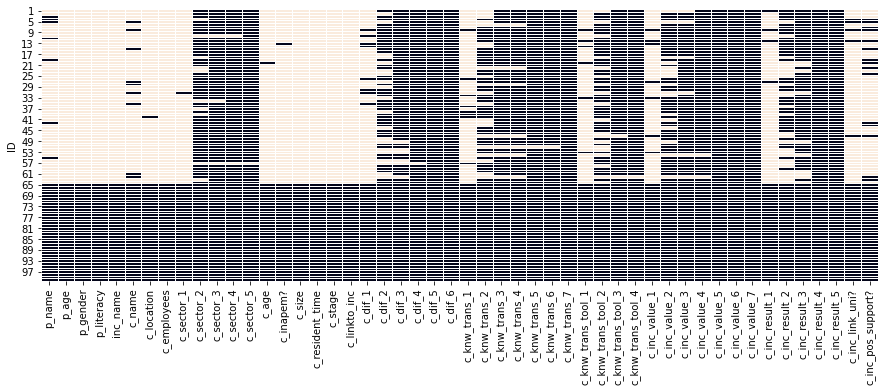

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados.notnull(), linewidths=1, cbar=False)

Como se verifica  no heatmap acima, o dataset tem vários valores omissos (a preto), correspondentes a:
- linhas vazias
- colunas vazias e,
- colunas com poucos valores correspondentes às colunas de escolhar múltipla

In [10]:
# em primeiro lugar vamos eliminar linhas e colunas completamente vazias:
incubados.dropna(axis=0,how="all", inplace=True) #delete all empty rows
incubados.dropna(axis=1,how="all", inplace=True) #delete all empty columns

Após a remoçao de linhas e colunas vazias, permanecem as colunas de escolha multipla:
   - Sector de atividade
   - Dificuldades sentidas
   - Tipo de conhecimento transmitido pela incubadora
   - Ferramentas de transmissao de conhecimento
   - Valor adicionado pela incubadora
   - Resultados obtidos 

A estratégia para preecher este valores será a de considerar que os respondentes só assinalam as opções que são verdade para o seu caso (True) e as não assinaladas serão preenchidas com o valor (False).
Algumas destas colunas foram pré preenchidas com com valores Sim/Não e transformadas em True/False no momento da importação. Os nomes das colunas também poderão ser alterados para refletir a opção assinalada.  Faremos esta analise, coluna a coluna.

### Colunas do sector de actividade
Vamos criar uma variável categorica binomial que vai ser True caso o incubado tenha respondido esse sector de atividade e False em caso  contrario. 

In [11]:
sector_columns = ['c_sector_1','c_sector_2','c_sector_3','c_sector_4','c_sector_5']
incubados[sector_columns]

,c_sector_1,c_sector_2,c_sector_3,c_sector_4,c_sector_5
ID,,,,,
1,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,NaN
2,"(K)- Actividades Imobiliárias, Alugueres e Ser...",NaN,NaN,NaN,NaN
3,(H)- Alojamento e Restauração (Restaurantes e ...,NaN,NaN,NaN,NaN
4,(M)- Educação,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN
5,(M)- Educação,NaN,NaN,NaN,NaN
...,...,...,...,...,...
60,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,NaN
61,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,NaN
62,(O)- Outras Actividades de Serviços Colectivos...,NaN,NaN,NaN,NaN


In [12]:
incubados[sector_columns].notnull().sum()

c_sector_1    63
c_sector_2    10
c_sector_3     3
c_sector_4     2
c_sector_5     1
dtype: int64

Vemos que o numero de registos diminui ao longo das colunas indicando, provavelmente, atividades primárias, secundárias e terciárias. 

In [13]:
incubados[sector_columns[0]].unique() #valores uniques respondidos na primeira coluna

array(['(O)- Outras Actividades de Serviços Colectivos, Social e Pessoais',
       '(K)- Actividades Imobiliárias, Alugueres e Serviços Prestados às Empresas',
       '(H)- Alojamento e Restauração (Restaurantes e Similares)',
       '(M)- Educação',
       '(A)- Agricultura, Produção Animal e Silvicultura',
       '(C)- Indústrias Extractivas', '(F)- Construção e obras públicas',
       '(J)- Actividades Financeiras',
       '(E)- Produção e distribuição de Electricidade, Gás e de Água',
       '(G)- Comércio por Grosso e a Retalho; Reparação de Veículos Automóvel, Motociclos e de Bens de Uso Pessoal e Doméstico',
       nan, '(I)- Transportes, Armazenagem e Comunicações',
       '(N)- Saúde e Acção Social'], dtype=object)

In [14]:
#com base nos valores das respostas, podemos construir a lista de todas as atividades que foram respondidas pelo menos uma vez
criteria_list = [
    '(O)- Outras Actividades de Serviços Colectivos, Social e Pessoais',
    '(K)- Actividades Imobiliárias, Alugueres e Serviços Prestados às Empresas',
    '(H)- Alojamento e Restauração (Restaurantes e Similares)',
    '(M)- Educação',
    '(A)- Agricultura, Produção Animal e Silvicultura',
    '(C)- Indústrias Extractivas', 
    '(F)- Construção e obras públicas',
    '(J)- Actividades Financeiras',
    '(E)- Produção e distribuição de Electricidade, Gás e de Água',
    '(G)- Comércio por Grosso e a Retalho; Reparação de Veículos Automóvel, Motociclos e de Bens de Uso Pessoal e Doméstico',
    '(I)- Transportes, Armazenagem e Comunicações',
    '(N)- Saúde e Acção Social']

In [15]:
subset = incubados.iloc[:,8:13] # slice of the dataframe to convert to a new set of columns 


In [16]:
def transpose_values(criteria_list,subset):
    results = pd.DataFrame(columns= criteria_list) # empty dataframe that will contain the results
    for criteria in criteria_list:
        if pd.isnull(criteria):
            pass
        else:
            match = subset == criteria
            results[criteria] = match.any(axis=1)
    return results

In [17]:
results = transpose_values(criteria_list,subset)
results.sum(axis=1).value_counts()

1    53
2     7
0     1
3     1
4     1
5     1
dtype: int64

A maior parte dos incubados pertence apenas a um sector, 7 pertencem a dois 1 pertence a 5 sectores. 

In [18]:
#Eliminamos as antigas colunas que já não são necessárias e adicionamos os resultados 
incubados_updated = pd.concat([incubados,results], axis=1)
incubados_updated.drop(sector_columns, axis=1, inplace=True)

Vamos agora simplificar os nomeas das colunas dos sectores de atividade, substituindo apenas pela letra de acordo com a tabela:

|Código|Atividade Económica|
|:----:|:------------------|
|(O)| Outras Actividades de Serviços Colectivos, Social e Pessoais|
|(K)| Actividades Imobiliárias, Alugueres e Serviços Prestados às Empresas|
|(H)| Alojamento e Restauração (Restaurantes e Similares|
|(M)| Educação|
|(A)| Agricultura, Produção Animal e Silvicultura|
|(C)| Indústrias Extractivas|
|(F)| Construção e obras públicas|
|(J)| Actividades Financeiras|
|(E)| Produção e distribuição de Electricidade, Gás e de Água|
|(G)| Comércio por Grosso e a Retalho; Reparação de Veículos Automóvel, Motociclos e de Bens de Uso Pessoal e Doméstico|
|(I)| Transportes, Armazenagem e Comunicações|
|(N)| Saúde e Acção Social|

In [19]:
#Substituição da descrição longa pela letra correspondente
activity_columns = incubados_updated.iloc[:,37:].columns
activity_columns

Index(['(O)- Outras Actividades de Serviços Colectivos, Social e Pessoais',
       '(K)- Actividades Imobiliárias, Alugueres e Serviços Prestados às Empresas',
       '(H)- Alojamento e Restauração (Restaurantes e Similares)',
       '(M)- Educação', '(A)- Agricultura, Produção Animal e Silvicultura',
       '(C)- Indústrias Extractivas', '(F)- Construção e obras públicas',
       '(J)- Actividades Financeiras',
       '(E)- Produção e distribuição de Electricidade, Gás e de Água',
       '(G)- Comércio por Grosso e a Retalho; Reparação de Veículos Automóvel, Motociclos e de Bens de Uso Pessoal e Doméstico',
       '(I)- Transportes, Armazenagem e Comunicações',
       '(N)- Saúde e Acção Social'],
      dtype='object')

In [20]:
clean_columns = activity_columns.str.split(")").str[0].str.replace("(","", regex=False)

In [21]:
clean_columns = ["c_act_sector_"+item for item in clean_columns]

In [22]:
incubados_updated.rename(columns=dict(zip(activity_columns,clean_columns)), inplace=True)

<AxesSubplot:ylabel='ID'>

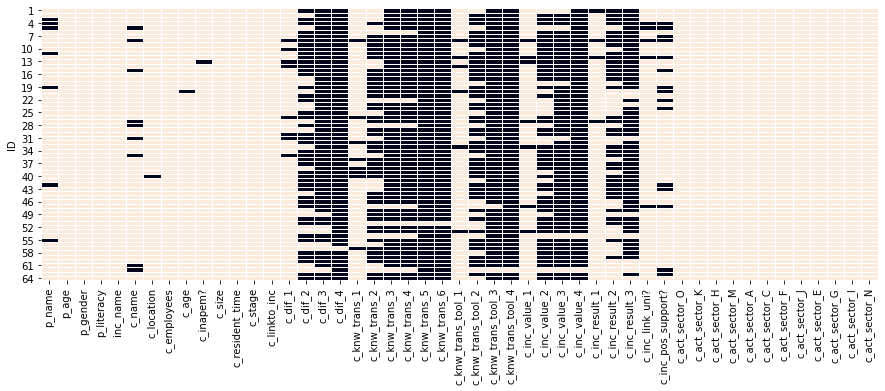

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated.notnull(), linewidths=1, cbar=False)

### Colunas da transferência de conhecimento
Vamos repetir os passos das colunas do sector de atividade
1. Isolar as colunas respectivas (subset)
2. Identificar os valores unicos (criteria_list)
3. Criar uma coluna por cada valor unico
4. Preencher com True/False (sim/nao) com base nos valores do subset
5. Eliminar subset

In [24]:
incubados_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   p_name              57 non-null     object
 1   p_age               64 non-null     object
 2   p_gender            64 non-null     object
 3   p_literacy          64 non-null     object
 4   inc_name            64 non-null     object
 5   c_name              55 non-null     object
 6   c_location          63 non-null     object
 7   c_employees         64 non-null     object
 8   c_age               63 non-null     object
 9   c_inapem?           63 non-null     object
 10  c_size              64 non-null     object
 11  c_resident_time     64 non-null     object
 12  c_stage             64 non-null     object
 13  c_linkto_inc        64 non-null     object
 14  c_dif_1             56 non-null     object
 15  c_dif_2             20 non-null     object
 16  c_dif_3             6 non-nu

In [25]:
#da lista de colunas vemos que sao as 18-23, 6 
subset2 = incubados_updated.iloc[:,18:24]
subset2

,c_knw_trans_1,c_knw_trans_2,c_knw_trans_3,c_knw_trans_4,c_knw_trans_5,c_knw_trans_6
ID,,,,,,
1,Marketing,Empreendedorismo,NaN,NaN,NaN,NaN
2,Recursos Humanos,Marketing,NaN,NaN,NaN,NaN
3,Comercialização de produtos e serviços,Empreendedorismo,NaN,NaN,NaN,NaN
4,Recursos Humanos,NaN,NaN,NaN,NaN,NaN
5,Marketing,Empreendedorismo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
60,Empreendedorismo,NaN,NaN,NaN,NaN,NaN
61,Recursos Humanos,Empreendedorismo,NaN,NaN,NaN,NaN
62,Marketing,Comercialização de produtos e serviços,Gestão Financeira,Empreendedorismo,NaN,NaN


In [26]:
subset2.notnull().sum()

c_knw_trans_1    56
c_knw_trans_2    21
c_knw_trans_3     7
c_knw_trans_4     7
c_knw_trans_5     1
c_knw_trans_6     1
dtype: int64

A maior parte dos registos estao nas colunas 1 e 2

In [27]:
criteria_list2 =  subset2['c_knw_trans_1'].unique() #nao existem valores adicionais(unicos) nas outras colunas
criteria_list2

array(['Marketing', 'Recursos Humanos',
       'Comercialização de produtos e serviços', 'Assistência jurídica',
       nan, 'Empreendedorismo', 'Gestão Estratégica', 'Gestão Financeira'],
      dtype=object)

In [28]:
criteria_list2 =['Marketing', 'Recursos Humanos',
       'Comercialização de produtos e serviços', 'Assistência jurídica', 'Empreendedorismo', 'Gestão Estratégica', 'Gestão Financeira']

In [29]:
results2 = transpose_values(criteria_list2,subset2)
results2

,Marketing,Recursos Humanos,Comercialização de produtos e serviços,Assistência jurídica,Empreendedorismo,Gestão Estratégica,Gestão Financeira
ID,,,,,,,
1,True,False,False,False,True,False,False
2,True,True,False,False,False,False,False
3,False,False,True,False,True,False,False
4,False,True,False,False,False,False,False
5,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...
60,False,False,False,False,True,False,False
61,False,True,False,False,True,False,False
62,True,False,True,False,True,False,True


In [30]:
short = ['mrkt',
 'hr',
 'sales',
 'legal',
 'entrpre',
 'strt',
 'finc']

In [31]:
clean_columns2 = ["c_knw_trans_"+item for item in short]

clean_columns2 = dict(zip(criteria_list2,clean_columns2))

In [32]:
clean_columns2

{'Marketing': 'c_knw_trans_mrkt',
 'Recursos Humanos': 'c_knw_trans_hr',
 'Comercialização de produtos e serviços': 'c_knw_trans_sales',
 'Assistência jurídica': 'c_knw_trans_legal',
 'Empreendedorismo': 'c_knw_trans_entrpre',
 'Gestão Estratégica': 'c_knw_trans_strt',
 'Gestão Financeira': 'c_knw_trans_finc'}

In [33]:
results2.rename(columns = clean_columns2, inplace=True)

In [34]:
#vamos juntar os resultados ao nosso dataset e eliminar as colunas antigas deste subset
incubados_updated2 = pd.concat([incubados_updated, results2], axis=1 )

In [35]:
incubados_updated2.drop(subset2.columns, axis=1,inplace=True)

<AxesSubplot:ylabel='ID'>

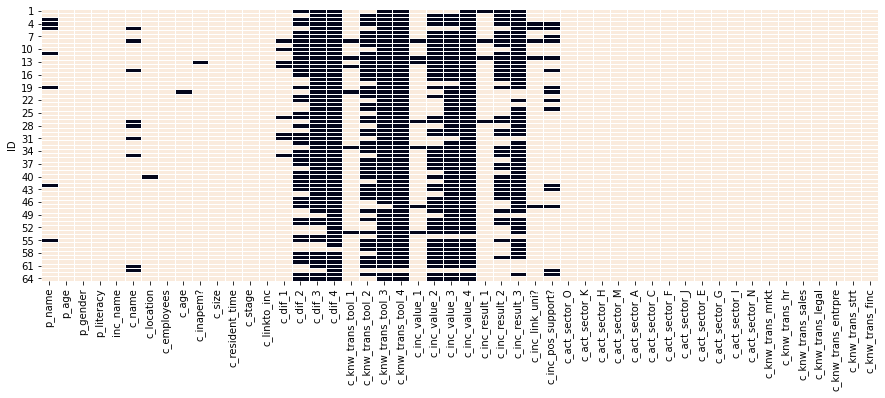

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated2.notnull(), linewidths=1, cbar=False)

No heatmap de dados omissos, já só são visiveis 4 grupos de variáveis, as dificuldades, as ferramentas de transferenci de conhecimento,o valor adicionado pela incubador e valor adicionado pela incubadora. 

### Colunas das ferramentas transferência de conhecimento
Vamos repetir os passos das colunas do sector de atividade
1. Isolar as colunas respectivas (subset3)
2. Identificar os valores unicos (criteria_list3)
3. Criar uma coluna por cada valor unico
4. Preencher com True/False (sim/nao) com base nos valores do subset
5. Eliminar subset3 da base de dados atualizada

In [37]:
#da lista de colunas acima identificam-se as colinas 18:21
subset3 = incubados_updated2.iloc[:,18:22]
subset3

,c_knw_trans_tool_1,c_knw_trans_tool_2,c_knw_trans_tool_3,c_knw_trans_tool_4
ID,,,,
1,Manuais,Formação e cursos,NaN,NaN
2,Manuais,NaN,NaN,NaN
3,Formação e cursos,NaN,NaN,NaN
4,Formação e cursos,NaN,NaN,NaN
5,Manuais,Fóruns,NaN,NaN
...,...,...,...,...
60,Manuais,NaN,NaN,NaN
61,Manuais,NaN,NaN,NaN
62,Manuais,Formação e cursos,Fóruns,Benchmarking


In [38]:
subset3.notnull().sum()

c_knw_trans_tool_1    58
c_knw_trans_tool_2    19
c_knw_trans_tool_3     2
c_knw_trans_tool_4     1
dtype: int64

In [39]:
subset3['c_knw_trans_tool_1'].unique() 

array(['Manuais ', 'Formação e cursos ', nan, 'Fóruns '], dtype=object)

In [40]:
subset3['c_knw_trans_tool_2'].unique()

array(['Formação e cursos ', nan, 'Fóruns ', 'Benchmarking '],
      dtype=object)

In [41]:
criteria_list3 = ['Manuais ', 'Formação e cursos ', 'Benchmarking ', 'Fóruns ']

In [42]:
results3 = transpose_values(criteria_list3,subset3)
results3.sum(axis=0)

Manuais               26
Formação e cursos     46
Benchmarking           3
Fóruns                 5
dtype: int64

In [43]:
results3

,Manuais,Formação e cursos,Benchmarking,Fóruns
ID,,,,
1,True,True,False,False
2,True,False,False,False
3,False,True,False,False
4,False,True,False,False
5,True,False,False,True
...,...,...,...,...
60,True,False,False,False
61,True,False,False,False
62,True,True,True,True


In [44]:
#renomear as colunas para a convençao utilizada
results3.columns

Index(['Manuais ', 'Formação e cursos ', 'Benchmarking ', 'Fóruns '], dtype='object')

In [45]:
short3 = ['manuais', 'training', 'benchmarking', 'forums']
clean_columns3 = ["c_knw_trans_tool_"+item for item in short3]

clean_columns3 = dict(zip(criteria_list3,clean_columns3))
results3.rename(columns = clean_columns3, inplace=True)

In [46]:
results3

,c_knw_trans_tool_manuais,c_knw_trans_tool_training,c_knw_trans_tool_benchmarking,c_knw_trans_tool_forums
ID,,,,
1,True,True,False,False
2,True,False,False,False
3,False,True,False,False
4,False,True,False,False
5,True,False,False,True
...,...,...,...,...
60,True,False,False,False
61,True,False,False,False
62,True,True,True,True


In [47]:
#juntar o resultado ao dataset original e apagar as colunas anteriores
incubados_updated3 = pd.concat([incubados_updated2, results3], axis=1 )
incubados_updated3.drop(subset3.columns, axis=1,inplace=True)

<AxesSubplot:ylabel='ID'>

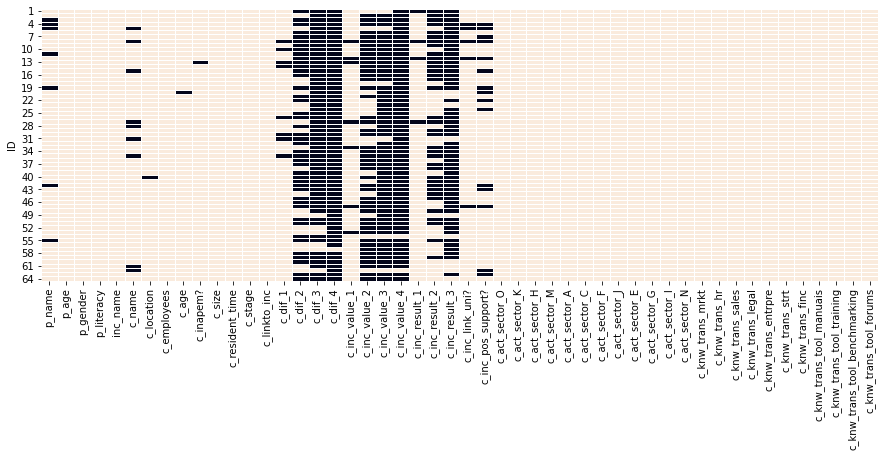

In [48]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated3.notnull(), linewidths=1, cbar=False)

### Colunas das dificuldades (c_dif_#)
Vamos repetir os passos anteriores
1. Isolar as colunas respectivas (subset4)
2. Identificar os valores unicos (criteria_list4)
3. Criar uma coluna por cada valor unico
4. Preencher com True/False (sim/nao) com base nos valores do subset
5. Eliminar subset4 da base de dados atualizada

In [49]:
incubados_updated3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   p_name                         57 non-null     object
 1   p_age                          64 non-null     object
 2   p_gender                       64 non-null     object
 3   p_literacy                     64 non-null     object
 4   inc_name                       64 non-null     object
 5   c_name                         55 non-null     object
 6   c_location                     63 non-null     object
 7   c_employees                    64 non-null     object
 8   c_age                          63 non-null     object
 9   c_inapem?                      63 non-null     object
 10  c_size                         64 non-null     object
 11  c_resident_time                64 non-null     object
 12  c_stage                        64 non-null     object
 13  c_linkt

In [50]:
#da lista de colunas acima identificam-se as colinas 14:18
subset4 = incubados_updated2.iloc[:,14:18]
subset4

,c_dif_1,c_dif_2,c_dif_3,c_dif_4
ID,,,,
1,Ausência de Infra-estruturas Físicas,NaN,NaN,NaN
2,Acesso a financiamentos e investimentos,Ausência ou baixa experiência em gestão empres...,NaN,NaN
3,Acesso a financiamentos e investimentos,NaN,NaN,NaN
4,Acesso a financiamentos e investimentos,NaN,NaN,NaN
5,Acesso a financiamentos e investimentos,Ausência de Infra-estruturas Físicas,NaN,NaN
...,...,...,...,...
60,Acesso a financiamentos e investimentos,NaN,NaN,NaN
61,Ausência de conhecimento técnico e tecnológico...,Ausência de Infra-estruturas Físicas,NaN,NaN
62,Acesso a financiamentos e investimentos,Ausência ou baixa experiência em gestão empres...,Baixa qualificação dos funcionários,NaN


In [51]:
subset4.notnull().sum()

c_dif_1    56
c_dif_2    20
c_dif_3     6
c_dif_4     1
dtype: int64

In [52]:
criteria_list4 = [
    'Acesso a financiamentos e investimentos ',
    'Ausência de conhecimento técnico e tecnológico para elaboração do Plano de negócios ',
    'Ausência de Infra-estruturas Físicas ',
    'Ausência ou baixa experiência em gestão empresarial  ',
    'Baixa qualificação dos funcionários ',
    'Pouca ou nenhuma noção sobre empreendedorismo ',
    ]

In [53]:
results4 = transpose_values(criteria_list4,subset4)
results4.sum(axis=0)

Acesso a financiamentos e investimentos                                                 51
Ausência de conhecimento técnico e tecnológico para elaboração do Plano de negócios      9
Ausência de Infra-estruturas Físicas                                                    11
Ausência ou baixa experiência em gestão empresarial                                      6
Baixa qualificação dos funcionários                                                      5
Pouca ou nenhuma noção sobre empreendedorismo                                            1
dtype: int64

In [54]:
results4

,Acesso a financiamentos e investimentos,Ausência de conhecimento técnico e tecnológico para elaboração do Plano de negócios,Ausência de Infra-estruturas Físicas,Ausência ou baixa experiência em gestão empresarial,Baixa qualificação dos funcionários,Pouca ou nenhuma noção sobre empreendedorismo
ID,,,,,,
1,False,False,True,False,False,False
2,True,False,False,True,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
5,True,False,True,False,False,False
...,...,...,...,...,...,...
60,True,False,False,False,False,False
61,False,True,True,False,False,False
62,True,False,False,True,True,False


In [55]:
#renomear as colunas para a convençao utilizada
results4.columns

Index(['Acesso a financiamentos e investimentos ',
       'Ausência de conhecimento técnico e tecnológico para elaboração do Plano de negócios ',
       'Ausência de Infra-estruturas Físicas ',
       'Ausência ou baixa experiência em gestão empresarial  ',
       'Baixa qualificação dos funcionários ',
       'Pouca ou nenhuma noção sobre empreendedorismo '],
      dtype='object')

In [56]:
short4 = ['funds',
       'bplan',
       'place',
       'manag_xp',
       'skills',
       'entrep']
clean_columns4 = ["c_dif_"+item for item in short4]

clean_columns4 = dict(zip(criteria_list4,clean_columns4))
results4.rename(columns = clean_columns4, inplace=True)

In [57]:
results4

,c_dif_funds,c_dif_bplan,c_dif_place,c_dif_manag_xp,c_dif_skills,c_dif_entrep
ID,,,,,,
1,False,False,True,False,False,False
2,True,False,False,True,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
5,True,False,True,False,False,False
...,...,...,...,...,...,...
60,True,False,False,False,False,False
61,False,True,True,False,False,False
62,True,False,False,True,True,False


In [58]:
#juntar o resultado ao dataset original e apagar as colunas anteriores
incubados_updated4 = pd.concat([incubados_updated3, results4], axis=1 )
incubados_updated4.drop(subset4.columns, axis=1,inplace=True)

<AxesSubplot:ylabel='ID'>

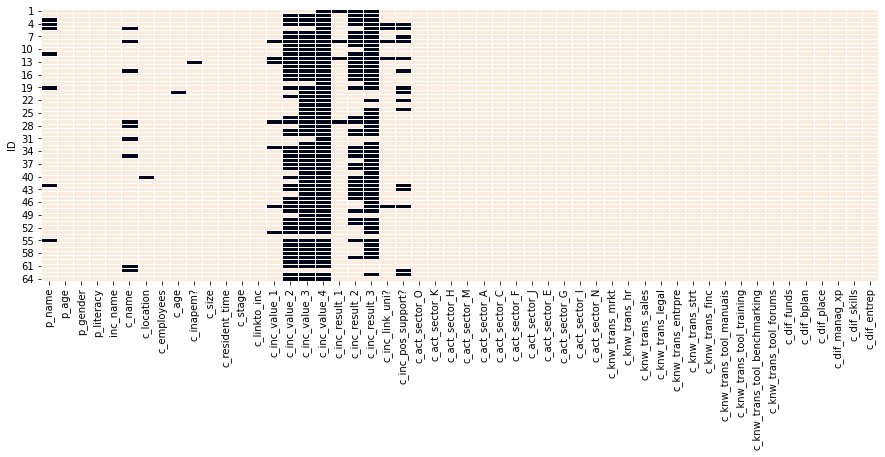

In [59]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated4.notnull(), linewidths=1, cbar=False)

### Colunas do valor adicionado pela incubdor (c_inc_value_#)
Vamos repetir os passos anteriores
1. Isolar as colunas respectivas (subset5)
2. Identificar os valores unicos (criteria_list5)
3. Criar uma coluna por cada valor unico
4. Preencher com True/False (sim/nao) com base nos valores do subset
5. Eliminar subset5 da base de dados atualizada

In [60]:
incubados_updated4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   p_name                         57 non-null     object
 1   p_age                          64 non-null     object
 2   p_gender                       64 non-null     object
 3   p_literacy                     64 non-null     object
 4   inc_name                       64 non-null     object
 5   c_name                         55 non-null     object
 6   c_location                     63 non-null     object
 7   c_employees                    64 non-null     object
 8   c_age                          63 non-null     object
 9   c_inapem?                      63 non-null     object
 10  c_size                         64 non-null     object
 11  c_resident_time                64 non-null     object
 12  c_stage                        64 non-null     object
 13  c_linkt

In [61]:
#da lista de colunas acima identificam-se as colinas 14:18
subset5 = incubados_updated4.iloc[:,14:18]
subset5

,c_inc_value_1,c_inc_value_2,c_inc_value_3,c_inc_value_4
ID,,,,
1,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento do Marketing,NaN
2,Recursos Tecnológicos,NaN,NaN,NaN
3,Desenvolvimento de novos produtos,NaN,NaN,NaN
4,Acesso a redes de empresas já incubadas,NaN,NaN,NaN
5,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento do Marketing,NaN
...,...,...,...,...
60,Acesso a redes de empresas já incubadas,NaN,NaN,NaN
61,Acesso a redes de empresas já incubadas,NaN,NaN,NaN
62,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento de novos produtos,Desenvolvimento do Marketing


In [62]:
subset5.notnull().sum()

c_inc_value_1    57
c_inc_value_2    17
c_inc_value_3     6
c_inc_value_4     2
dtype: int64

In [63]:
subset5['c_inc_value_1'].unique()

array(['Ferramentas de gestão', 'Recursos Tecnológicos',
       'Desenvolvimento de novos produtos',
       'Acesso a redes de empresas já incubadas',
       'Desenvolvimento do Marketing', nan, 'Obtenção de Divisas ',
       'Acesso ao Crédito'], dtype=object)

In [64]:
criteria_list5 = ['Ferramentas de gestão', 'Recursos Tecnológicos',
       'Desenvolvimento de novos produtos',
       'Acesso a redes de empresas já incubadas',
       'Desenvolvimento do Marketing', 'Obtenção de Divisas ',
       'Acesso ao Crédito']

In [65]:
results5 = transpose_values(criteria_list5,subset5)
results5.sum(axis=0)

Ferramentas de gestão                      15
Recursos Tecnológicos                      16
Desenvolvimento de novos produtos           8
Acesso a redes de empresas já incubadas    22
Desenvolvimento do Marketing               14
Obtenção de Divisas                         3
Acesso ao Crédito                           4
dtype: int64

In [66]:
results5

,Ferramentas de gestão,Recursos Tecnológicos,Desenvolvimento de novos produtos,Acesso a redes de empresas já incubadas,Desenvolvimento do Marketing,Obtenção de Divisas,Acesso ao Crédito
ID,,,,,,,
1,True,True,False,False,True,False,False
2,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False
5,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...
60,False,False,False,True,False,False,False
61,False,False,False,True,False,False,False
62,True,True,True,False,True,False,False


In [67]:
#renomear as colunas para a convençao utilizada
results5.columns

Index(['Ferramentas de gestão', 'Recursos Tecnológicos',
       'Desenvolvimento de novos produtos',
       'Acesso a redes de empresas já incubadas',
       'Desenvolvimento do Marketing', 'Obtenção de Divisas ',
       'Acesso ao Crédito'],
      dtype='object')

In [68]:
short5 = ['manag_tools', 'tek_res',
       'new_prod',
       'network',
       'markt', 'divisas',
       'credit']
clean_columns5 = ["c_inc_value_"+item for item in short5]

clean_columns5 = dict(zip(criteria_list5,clean_columns5))
results5.rename(columns = clean_columns5, inplace=True)

In [69]:
results5

,c_inc_value_manag_tools,c_inc_value_tek_res,c_inc_value_new_prod,c_inc_value_network,c_inc_value_markt,c_inc_value_divisas,c_inc_value_credit
ID,,,,,,,
1,True,True,False,False,True,False,False
2,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False
5,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...
60,False,False,False,True,False,False,False
61,False,False,False,True,False,False,False
62,True,True,True,False,True,False,False


In [70]:
#juntar o resultado ao dataset original e apagar as colunas anteriores
incubados_updated5 = pd.concat([incubados_updated4, results5], axis=1 )
incubados_updated5.drop(subset5.columns, axis=1,inplace=True)

<AxesSubplot:ylabel='ID'>

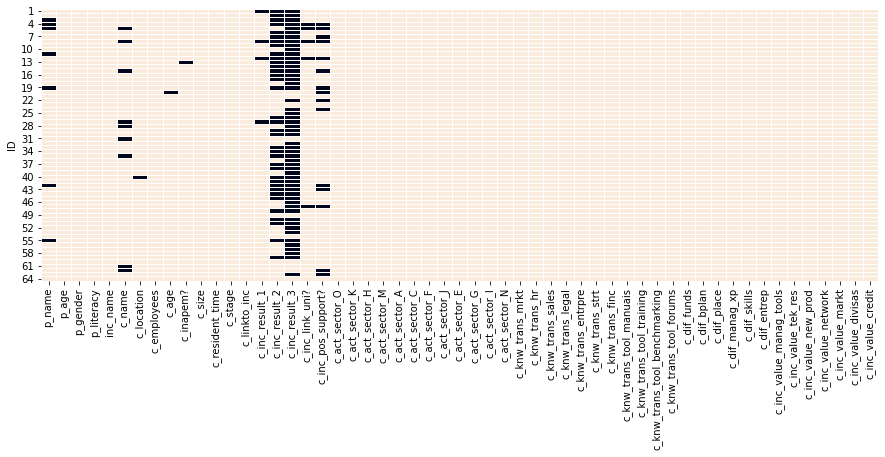

In [71]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated5.notnull(), linewidths=1, cbar=False)

### Colunas dos resultados derivados da incubadora (c_inc_result_#)
Vamos repetir os passos anteriores
1. Isolar as colunas respectivas (subset5)
2. Identificar os valores unicos (criteria_list5)
3. Criar uma coluna por cada valor unico
4. Preencher com True/False (sim/nao) com base nos valores do subset
5. Eliminar subset5 da base de dados atualizada

In [72]:
incubados_updated5.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   p_name                         57 non-null     object
 1   p_age                          64 non-null     object
 2   p_gender                       64 non-null     object
 3   p_literacy                     64 non-null     object
 4   inc_name                       64 non-null     object
 5   c_name                         55 non-null     object
 6   c_location                     63 non-null     object
 7   c_employees                    64 non-null     object
 8   c_age                          63 non-null     object
 9   c_inapem?                      63 non-null     object
 10  c_size                         64 non-null     object
 11  c_resident_time                64 non-null     object
 12  c_stage                        64 non-null     object
 13  c_linkt

In [73]:
#da lista de colunas acima identificam-se as colinas 14:17
subset6 = incubados_updated5.iloc[:,14:17]
subset6

,c_inc_result_1,c_inc_result_2,c_inc_result_3
ID,,,
1,NaN,NaN,NaN
2,Rede de contactos para oportunidades de negócio,NaN,NaN
3,Parcerias com empresas já firmadas no mercado,NaN,NaN
4,A grande visibilidade que a Incubadora proporc...,NaN,NaN
5,A grande visibilidade que a Incubadora proporc...,Parcerias com empresas já firmadas no mercado,NaN
...,...,...,...
60,Rede de contactos para oportunidades de negócio,Internet banda larga 24/24,Não pagar a renda de um escritório
61,Rede de contactos para oportunidades de negócio,Internet banda larga 24/24,Não pagar a renda de um escritório
62,Rede de contactos para oportunidades de negócio,Internet banda larga 24/24,Não pagar a renda de um escritório


In [74]:
subset6.notnull().sum()

c_inc_result_1    60
c_inc_result_2    28
c_inc_result_3    10
dtype: int64

In [75]:
subset6['c_inc_result_1'].value_counts()

Rede de contactos para oportunidades de negócio                 30
A grande visibilidade que a Incubadora proporciona a Empresa    14
Internet banda larga 24/24                                       7
Parcerias com empresas já firmadas no mercado                    5
Não pagar a renda de um escritório                               4
Name: c_inc_result_1, dtype: int64

In [76]:
subset6['c_inc_result_1'].unique()

array([nan, 'Rede de contactos para oportunidades de negócio',
       'Parcerias com empresas já firmadas no mercado',
       'A grande visibilidade que a Incubadora proporciona a Empresa',
       'Não pagar a renda de um escritório', 'Internet banda larga 24/24'],
      dtype=object)

In [77]:
criteria_list6 = ['Rede de contactos para oportunidades de negócio',
       'Parcerias com empresas já firmadas no mercado',
       'A grande visibilidade que a Incubadora proporciona a Empresa',
       'Não pagar a renda de um escritório', 'Internet banda larga 24/24']

In [78]:
results6 = transpose_values(criteria_list6,subset6)
results6.sum(axis=0)

Rede de contactos para oportunidades de negócio                 30
Parcerias com empresas já firmadas no mercado                   13
A grande visibilidade que a Incubadora proporciona a Empresa    27
Não pagar a renda de um escritório                              15
Internet banda larga 24/24                                      13
dtype: int64

In [79]:
results6

,Rede de contactos para oportunidades de negócio,Parcerias com empresas já firmadas no mercado,A grande visibilidade que a Incubadora proporciona a Empresa,Não pagar a renda de um escritório,Internet banda larga 24/24
ID,,,,,
1,False,False,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,True,True,False,False
...,...,...,...,...,...
60,True,False,False,True,True
61,True,False,False,True,True
62,True,False,False,True,True


In [80]:
#renomear as colunas para a convençao utilizada
results6.columns

Index(['Rede de contactos para oportunidades de negócio',
       'Parcerias com empresas já firmadas no mercado',
       'A grande visibilidade que a Incubadora proporciona a Empresa',
       'Não pagar a renda de um escritório', 'Internet banda larga 24/24'],
      dtype='object')

In [81]:
short6 = ['network_oport','senior_partn','image','rent','wifi']
clean_columns6 = ["c_inc_result_"+item for item in short6]

clean_columns6 = dict(zip(criteria_list6,clean_columns6))
results6.rename(columns = clean_columns6, inplace=True)

In [82]:
results6

,c_inc_result_network_oport,c_inc_result_senior_partn,c_inc_result_image,c_inc_result_rent,c_inc_result_wifi
ID,,,,,
1,False,False,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,True,True,False,False
...,...,...,...,...,...
60,True,False,False,True,True
61,True,False,False,True,True
62,True,False,False,True,True


In [83]:
#juntar o resultado ao dataset original e apagar as colunas anteriores
incubados_updated6 = pd.concat([incubados_updated5, results6], axis=1 )
incubados_updated6.drop(subset6.columns, axis=1,inplace=True)

<AxesSubplot:ylabel='ID'>

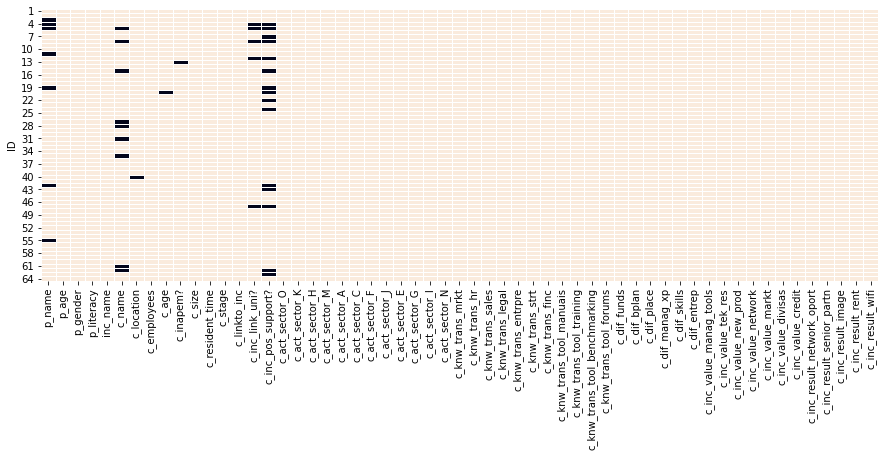

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(incubados_updated6.notnull(), linewidths=1, cbar=False)

hurray! O dataset está pronto para a análise estatistica. As restantes correções serão efetuadas à medida que se analisa cada uma das variáveis. 

# Simplificação das Variáveis Categóricas

### Idade dos incubados p_age

In [85]:
incubados_updated6['p_age'].describe()

count                  64
unique                  4
top       De 25 a 34 anos
freq                   42
Name: p_age, dtype: object

In [86]:
incubados_updated6['p_age'] = incubados_updated6['p_age'].str.replace("De","").str.replace(" anos","").str.replace(" a ","-")

In [87]:
incubados_updated6['p_age'].value_counts(dropna=False)

 25-34    42
 35-44    11
 18-24    10
 55-64     1
Name: p_age, dtype: int64

### Genero p_gender

In [88]:
incubados_updated6['p_gender'].value_counts(dropna=False)

Masculino    57
Feminino      7
Name: p_gender, dtype: int64

### Grau de Escolaridade p_literacy

In [89]:
incubados_updated6['p_literacy'].value_counts(dropna=False)


Licenciatura     40
Técnico Médio    20
Mestrado          4
Name: p_literacy, dtype: int64

### Incubadora inc_name

In [90]:
incubados_updated6['inc_name'].value_counts(dropna=False)

Incubadora das TICS INAPEM    17
CLESE DO UÍGE                 11
CLESE DO HUAMBO               10
CLESE DA HUÍLA                 9
CLESE DE MALANGE               5
CLESE-SUMBE                    4
CLESE KUANZA NORTE             3
CLESE MOXICO                   1
CLESE BENGUELA                 1
IEMP                           1
CLESE DO DUNDO                 1
CLESE DE CABINDA               1
Name: inc_name, dtype: int64

In [91]:
#simplificar nomes e retirar capitalização 

incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.replace(" DO "," ")
incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.replace(" DA "," ")
incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.replace(" DE "," ")
incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.replace("-"," ")
incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.replace("Incubadora das TICS ","")
incubados_updated6['inc_name'] = incubados_updated6['inc_name'].str.strip()

In [92]:
#a maior parte sao de CLESES (centros locais de empreendedorismo e serviços de emprego)
def cap_second(i):
    name = i.split()
    if len(name)>1:
        for n in range(len(name)-1):
            name[n+1]= name[n+1].lower().capitalize()
    return ' '.join(name)

incubados_updated6['inc_name'] = incubados_updated6['inc_name'].apply(cap_second)   

In [93]:
incubados_updated6['inc_name'].value_counts()

INAPEM                17
CLESE Uíge            11
CLESE Huambo          10
CLESE Huíla            9
CLESE Malange          5
CLESE Sumbe            4
CLESE Kuanza Norte     3
CLESE Dundo            1
CLESE Benguela         1
IEMP                   1
CLESE Cabinda          1
CLESE Moxico           1
Name: inc_name, dtype: int64

### Nomes da empresa incubada
Nao será necessária para a analise

In [94]:
incubados_updated6['c_name'].unique() #sem necessidade de alterações 

array(['CBL – CORPORAÇÃO BRILHANTE, LDA', 'San Alf Monteiro', 'Paxunal',
       'Ezequiel Dassala- comércio e prestação de Serviço', nan,
       'MCD, Lda', 'JÁ editora', 'ExI, Lda', 'Jeremias Service, Lda',
       'J. C. Comercial', 'Castro bar', 'Bwé - Limpinho', 'Chela Editora',
       'Di Martins - Comercio Prestação de Serviço (SU) Lda',
       'Hamburgaria Topissima', 'J. C. - Comercial', 'Nimunga',
       'Organizações Tartarugas', 'Soutecno - Lda',
       'AQU – comercio misto e prestaçao de serviço',
       'CMB (Arquitectura E Engenharia E Técnicas Afíns)',
       'YRAA- CORPORATE', 'Conta Dez Consultoria ', 'TCHANGUENDELA',
       'M. M. Q. - Comercial', 'F.M.C - Comercial', 'BTVL- Manuel Lda',
       'Jomfuk SU Lda', 'Suzy Castro Lda', 'Sermaia', 'N Contas',
       'ESJ- Prestação de Servicos', 'PDMP- Prestação De Serviços',
       'A.C.S- Palanca  Comércio Geral E Prestação De Serviços',
       'BERO-OLIVER', 'Camunday Consultoria',
       'ARIOF – Desenvolvimento De Negóc

### Localizaçao da empresa incubada (sede legal?)
Parece coincidir com a da incubadora, mas poderá ser necessário separar a localidade da cidade, considerando a maior complexidade e a  incerteza dos critérios, eventuais correções aos  dados serão efetuadas em sede de analise

In [95]:
incubados_updated6['c_location'].value_counts() #a verificar necessidades com localização

Uíge                          11
Huíla - Lubango                9
Huambo                         9
Luanda                         6
Luanda-Ingombotas              5
Malange - sede                 4
CUANZA SUL- SUMBE              3
Cuanza Norte ( Ndalatando)     3
Luanda-Morro Bento             1
CABINDA, MUNICÍPIO SEDE.       1
Luanda, Cassenda               1
Luanda- Belas                  1
Huambo, Benguela e Luanda      1
Luanda - Rua da Missão         1
Luanda( Belas )                1
luanda                         1
 Malange                       1
Moxico                         1
Lunda Norte, Dundo             1
Luanda, Kilamba                1
Benguela                       1
Name: c_location, dtype: int64

### Idade da empresa incubada c_age
será efetuada apenas a limpeza para encurtar o nome dos grupos etários

In [96]:
incubados_updated6['c_age'] = incubados_updated6['c_age'].str.replace("De","").str.replace(" anos","").str.replace(" a "," - ").str.replace(" ano","").str.replace("Mais de ","> ").str.strip()

In [97]:
incubados_updated6['c_age'].value_counts()

3 - 5     30
1 - 2     14
0 - 1     13
> 10       3
6 - 10     3
Name: c_age, dtype: int64

### Numero de empregados na empresa
será efetuada apenas a limpeza para encurtar o nome dos grupos 

In [98]:
incubados_updated6['c_employees'].value_counts()

Entre 1 e 10      53
Entre 10 e 100    11
Name: c_employees, dtype: int64

In [99]:
incubados_updated6['c_employees'] = incubados_updated6['c_employees'].str.replace("Entre ","").str.replace(" e "," - ").str.strip()

In [100]:
incubados_updated6['c_employees'].value_counts()

1 - 10      53
10 - 100    11
Name: c_employees, dtype: int64

### Tempo de residencia da empresa na incubadora c_resident_time(years)
Este sendo o unico valor que pode ser numérico, vamos transformar esta coluna dados decimais (float)

In [101]:
incubados_updated6['c_resident_time'] = incubados_updated6['c_resident_time'].str.lower().str.replace("6 meses","0.5").str.replace('ano','').str.replace('s','').str.replace('mai de ','')

In [102]:
incubados_updated6['c_resident_time'].astype(float)
# uma vez que existem valores em meses e em anos, passamos tudo para anos e renomeamos as coluna para incluir a unidade
incubados_updated6.rename(columns={'c_resident_time':'c_resident_years'},inplace=True)

In [103]:
incubados_updated6['c_resident_years'].value_counts()

0.5     23
1       16
3       10
2        8
4        7
Name: c_resident_years, dtype: int64

In [104]:
incubados_updated6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   p_name                         57 non-null     object
 1   p_age                          64 non-null     object
 2   p_gender                       64 non-null     object
 3   p_literacy                     64 non-null     object
 4   inc_name                       64 non-null     object
 5   c_name                         55 non-null     object
 6   c_location                     63 non-null     object
 7   c_employees                    64 non-null     object
 8   c_age                          63 non-null     object
 9   c_inapem?                      63 non-null     object
 10  c_size                         64 non-null     object
 11  c_resident_years               64 non-null     object
 12  c_stage                        64 non-null     object
 13  c_linkt

In [105]:
#atualização do tipo das variáveis para categoricas ou boolean 
incubados_updated6[incubados_updated6.columns[1:5]] = incubados_updated6[incubados_updated6.columns[1:5]].astype("category")
incubados_updated6[incubados_updated6.columns[6:9]] = incubados_updated6[incubados_updated6.columns[6:9]].astype("category")
incubados_updated6[incubados_updated6.columns[12:14]] = incubados_updated6[incubados_updated6.columns[12:14]].astype("category")
incubados_updated6[incubados_updated6.columns[9]] = incubados_updated6[incubados_updated6.columns[9]].astype("boolean")
incubados_updated6[incubados_updated6.columns[11]] = incubados_updated6[incubados_updated6.columns[11]].astype("float")
incubados_updated6[incubados_updated6.columns[14:]] = incubados_updated6[incubados_updated6.columns[14:]].astype("boolean")
incubados_updated6[incubados_updated6.columns[10]] = incubados_updated6[incubados_updated6.columns[10]].astype("category")

In [106]:
incubados_updated6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   p_name                         57 non-null     object  
 1   p_age                          64 non-null     category
 2   p_gender                       64 non-null     category
 3   p_literacy                     64 non-null     category
 4   inc_name                       64 non-null     category
 5   c_name                         55 non-null     object  
 6   c_location                     63 non-null     category
 7   c_employees                    64 non-null     category
 8   c_age                          63 non-null     category
 9   c_inapem?                      63 non-null     boolean 
 10  c_size                         64 non-null     category
 11  c_resident_years               64 non-null     float64 
 12  c_stage                        64 non-

In [107]:
# exportar dtypes para dictionary
incubados_updated6[incubados_updated6.columns[3]].dtype
# exportar dtypes para dictionary
dtypes = {column:incubados_updated6[column].dtype.name for column in incubados_updated6.columns}

In [108]:
# gravar a nova base de dados em formato CSV
incubados_updated6.to_csv('./data_output/incubados.csv', sep=',')
# gravar types da nova base de dados em formato Json
import json
with open('./data_output/incubados_dtypes.json', 'w') as json_file:
    json.dump(dtypes, json_file)